In [26]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score as r2

warnings.filterwarnings('ignore')
%matplotlib inline

#### Import last file updated and some adjustments

In [3]:
sae=pd.read_csv('../data/sae_dataset_updated.csv')
sae.head()

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,registration_date,Mileage,Price,oricpric,PriceChangeCount,AgeOfVeh,LossVal,DevPerKm,DevPerAge,KmPerAge
0,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2008-07-01,238000,2990,2990.0,NaN,4234.0,16331,0.068618,3.857109,56.211620
1,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2010-06-15,90000,4499,4499.0,NaN,3520.0,14822,0.164689,4.210795,25.568182
2,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2005-07-01,210000,2490,2700.0,1.0,5330.0,16831,0.080148,3.157786,39.399625
3,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2009-10-15,259000,6500,6500.0,NaN,4745.0,47750,0.184363,10.063224,54.583772
4,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2006-07-01,155000,4900,7500.0,1.0,4965.0,49350,0.318387,9.939577,31.218530


In [5]:
sae['VehicleNationalCode']=sae['VehicleNationalCode'].astype('str')
sae['VehicleGrossNewPrice']=sae['VehicleGrossNewPrice'].astype('int')
sae['registration_date']=pd.to_datetime(sae['registration_date'], format='%Y-%m-%d')
sae['SAEReporteddate']=pd.to_datetime(sae['SAEReporteddate'], format='%Y-%m-%d')
sae['VehicleProductionStart']=pd.to_datetime(sae['VehicleProductionStart'], format='%Y-%m-%d')
sae['VehicleProductionEnd']=pd.to_datetime(sae['VehicleProductionEnd'], format='%Y-%m-%d', errors='coerce')
sae2020=sae[sae.SAEReporteddate=='2020-02-03']
sae2022=sae[sae.SAEReporteddate=='2022-10-12']

In [7]:
sae.round(2).head()

,VehicleMarketCode,VehicleNationalCode,VehicleSegmentationGlobal,VehicleModelIntlName,Bodytype_Group,Fuel_Group,Transmission_Group,Drivetype_Group,VehicleKW,VehicleDoors,...,registration_date,Mileage,Price,oricpric,PriceChangeCount,AgeOfVeh,LossVal,DevPerKm,DevPerAge,KmPerAge
0,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2008-07-01,238000,2990,2990.0,NaN,4234.0,16331,0.07,3.86,56.21
1,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2010-06-15,90000,4499,4499.0,NaN,3520.0,14822,0.16,4.21,25.57
2,ES,29263,Small LCV,Combo,Panel van,Diesel,Manual,2WD,73,4.0,...,2005-07-01,210000,2490,2700.0,1.0,5330.0,16831,0.08,3.16,39.40
3,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2009-10-15,259000,6500,6500.0,NaN,4745.0,47750,0.18,10.06,54.58
4,ES,30020,E,607,Sedan,Diesel,Automated,2WD,150,4.0,...,2006-07-01,155000,4900,7500.0,1.0,4965.0,49350,0.32,9.94,31.22


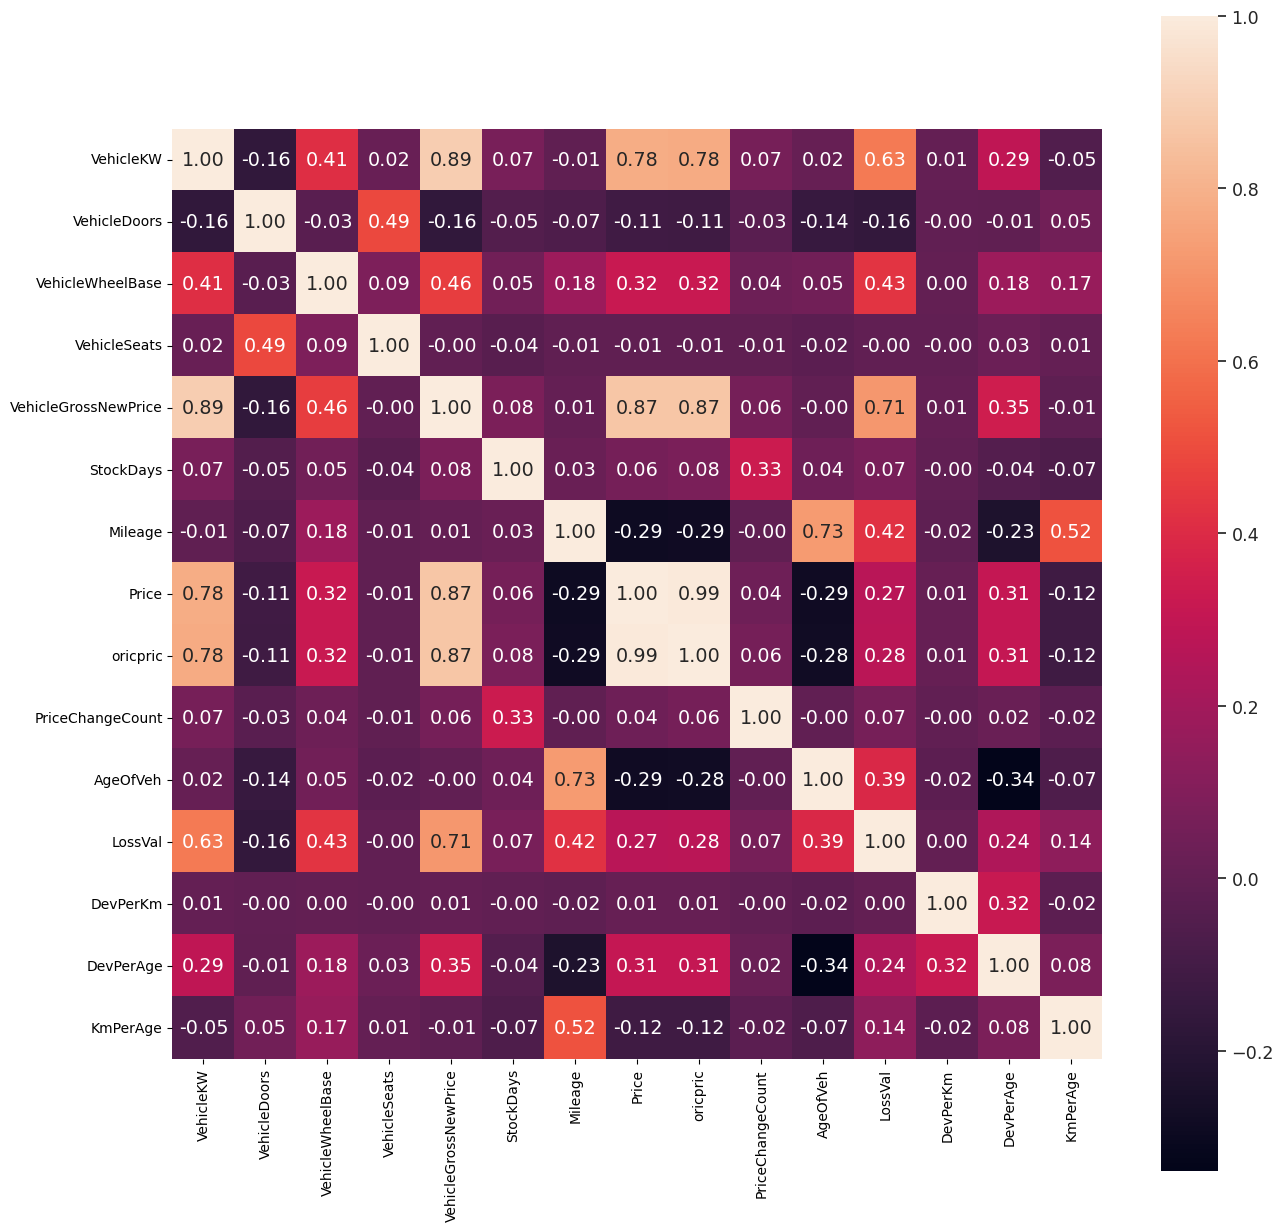

In [9]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)

sns.set(font_scale = 1.15)
sns.heatmap(sae.corr(),
           cbar=True,
           annot=True,
           square=True,
           fmt='.2f',
           ax=ax);

### Linear Regression

Linear regression is simple but powerful model to analyze relationship between a set of independent and dependent variables.

In [39]:
# y= mx+b , Price = m*vehicleKW + b

x=sae.VehicleKW
y=sae.Price

linreg=linregress(x,y)
linreg

LinregressResult(slope=228.2109602065776, intercept=-4125.725962251974, rvalue=0.7803504692777012, pvalue=0.0, stderr=0.4164121060187886, intercept_stderr=45.5424438236118)

I want to see **R-square** to show how well the data fit the regression model (the goodness of fit)

In [40]:
R2=linreg[2]**2
R2

0.6089468549019286

Here reveals that 61% of the variability observed in the target variable is explained by the regression model. Generally, higher r-squared indicates more variability is explained by the model

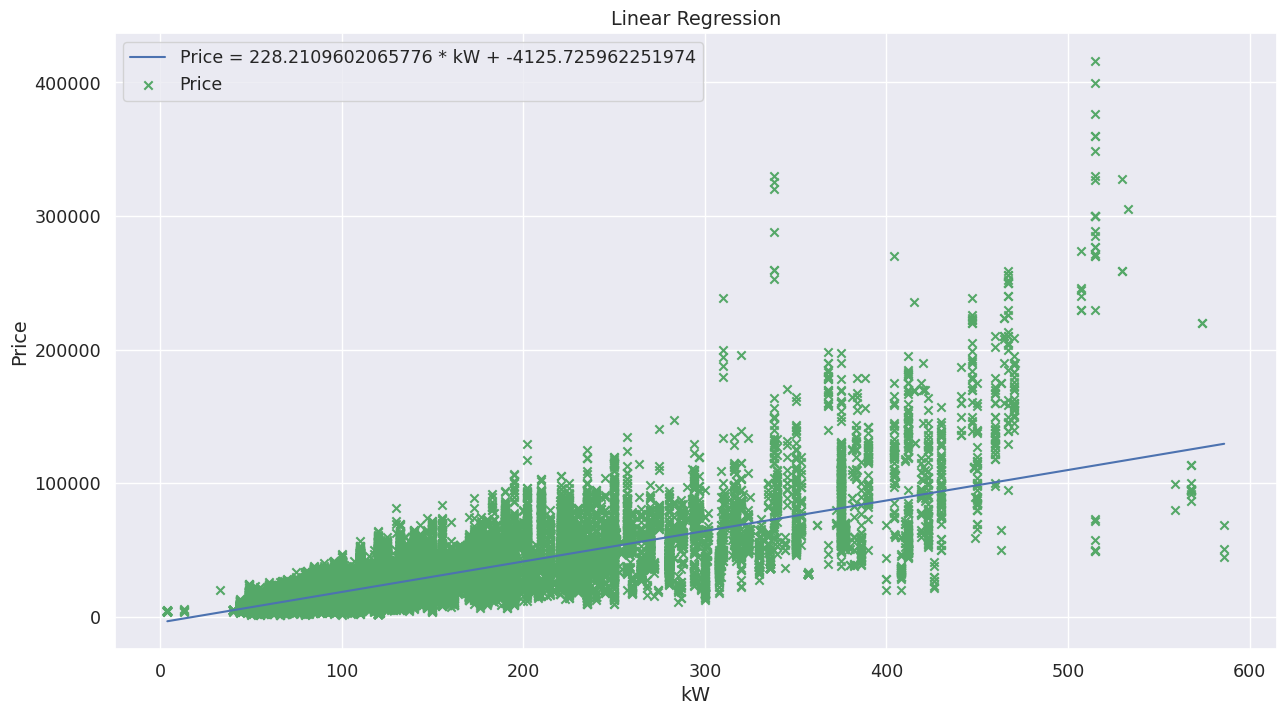

In [41]:
x=np.linspace(sae.VehicleKW.min(), sae.VehicleKW.max(), 50)
y=linreg[0]*x+linreg[1]

plt.figure(figsize=(15,8))
plt.plot(x,y,label='Price = {} * kW + {}'.format(linreg[0], linreg[1]))
plt.scatter(sae.VehicleKW, sae.Price, marker='x', c='g', label='Price')

plt.title('Linear Regression')
plt.xlabel('kW')
plt.ylabel('Price')
plt.legend()
plt.show();

#### Linear regression with statsmodel adding more constants

I've going to add some constants to improve r-square but avoiding that there is an over fitting of the model

In [18]:
Y = sae['Price']
X = sm.add_constant(sae[['VehicleGrossNewPrice','VehicleKW','Mileage','AgeOfVeh']])

linear_reg=sm.OLS(Y,X).fit()
predictions=linear_reg.predict(X)
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                 2.693e+05
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:56:07   Log-Likelihood:            -1.9304e+06
No. Observations:              192880   AIC:                         3.861e+06
Df Residuals:                  192875   BIC:                         3.861e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5642.7911     34.982    161.306      0.000    5574.228    5711.355
VehicleGrossNewPrice     0.6097      0.001    422.867      0.000       0.607       0.613
VehicleKW                9.4264      0.580     16.250      0.000       8.289      10.563
Mileage                 -0.0469      0.000   -149.328      0.000      -0.048      -0.046
AgeOfVeh                -1.8840      0.017   -108.311      0.000      -1.918      -1.850
==============================================================================
Omnibus:                    79765.048   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13526817.251
Skew:                           0.904   Prob(JB):                         0.00
Kurtosis:                      43.986   Cond. No.                     2.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Taking a look a high R-squared (around 85%) indicates that the performance of the seccurity or fund moves relatively in line with the index.

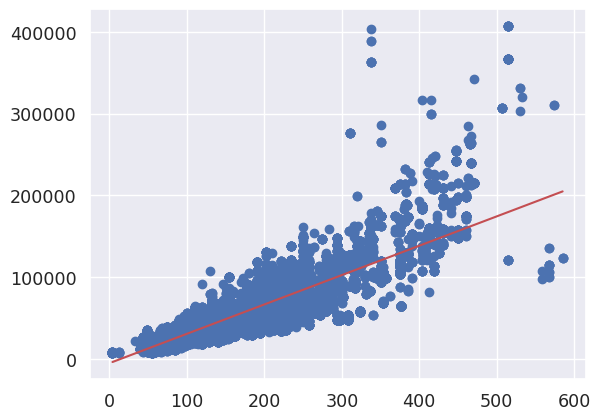

In [19]:
def linear_regression_plot(q,m):
    slope, intercept, r_value, p_value, std_err = linregress(q,m)
    
    def fn(x):
        return x * slope+intercept
    x = np.arange(q.min(),q.max(),1)
    
    y = [fn(x0) for x0 in x]
    plt.plot(x,y,'r')
    plt.scatter(q,m)
    
linear_regression_plot(sae['VehicleKW'], sae['VehicleGrossNewPrice'])

#### END Checkpoint

Onece It has been verified that the correlation between variables exists, I'm not going to deep into a prediction model and I'm going to conclude the analysis at this point.

I will add a data viz in Tableau about the Dataset.